# TP6 - Etude du pendule oscillant

#### Les objectifs de ce sixième et dernier TP sont de 
 - savoir résoudre numériquement un système différentiel du premier ordre (avec conditions initiales) à 2 variables 
 - savoir visualiser et comprendre le comportement des solutions du système dans le plan de phase
 - comprendre la notion de linéarisation d'un système dynamique proche d'un état d'équilibre
 - comprendre les différents régimes d'oscillation d'un pendule simple à partir de l'étude mathématique

#### Méthodologie
 - vous prendrez le temps de traiter les questions de nature théorique sur papier : elles vous préparent aussi à l'examen
 - vous utiliserez ces réponses pour comprendre (et programmer quand demandé) les questions de nature numérique
 - vous exécuterez les cellules pour comprendre ce qui est programmé dans les exemples fournis

$\textbf{NB}$: les outils nécessaires pour répondre aux questions associées à la résolution numérique et à la visualisation sont ceux du TP5.

[Lien vers le notebook du TP5](https://moodle.caseine.org/mod/resource/view.php?id=60272)

#### En vue de l'évaluation de votre travail durant cette séance
- Renommez ce notebook en "TP6_NOM_Prenom.ipynb"
- A la fin de la séance, enregistrez ce notebook complété : "Fichier"->"Télécharger au format"->"Notebook (.ipynb)" sur l'ordinateur 
- Envoyez-le en pièce jointe par email à l'adresse donnée par votre enseignant

Vous utiliserez votre $\textbf{adresse étudiante}$ [LIEN VERS VOTRE MESSAGERIE](http://webmail.etu.univ-grenoble-alpes.fr/)

- Indiquez vos nom, prénom, parcours et groupe dans la cellule suivante

In [ ]:
###########################
# NOM : FORSON
# PRENOM : Kaya
# PARCOURS & GROUPE : GMP 2
###########################

#### Les librairies python de la séance

Les librairies (ou paquets) utilisés dans cette séance sont
* `matplotlib` qui permet de faire tout type de visualisation
* `numpy` qui permet de représenter les discrétisations sous forme de vecteurs (ou de matrices) et d'effectuer des opérations sur ces variables
* `scipy` qui regroupe de nombreux algorithmes pour le calcul scientifique dont le solveur d'ODE

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

# 1 - Introduction & un peu de théorie

[Lien vers le chapitre 3](https://moodle.caseine.org/pluginfile.php/138321/mod_resource/content/2/Chap.03.pdf) - Ce chapitre contient toutes les notions essentielles à la compréhension et la résolution du problème du pendule oscillant.

[Lien vers le dernier cours en amphi](https://moodle.caseine.org/pluginfile.php/183920/mod_resource/content/2/amphi.12.pdf) - Un peu plus de détails sur le problème du pendule oscillant.

On considère l'équation différentielle qui décrit les oscillations d'un pendule simple de longueur $\ell$, accroché à une de ses extrémités, et soumis à son poids:

$$
\textbf{équation du mouvement} \quad y''(t)=-\gamma y'(t)-\omega^2\sin(y(t)) \qquad\qquad (Eq.1)
$$
où 
- $y(t)\in[-\pi,\pi]$ représente l'angle du pendule par rapport \`a la verticale,
- $y'(t)$ est la vitesse angulaire du pendule.

Dans cette équation, deux phénomènes sont pris en compte:
 - le frottement du pendule à son extrémité liée à l'axe de rotation, qui se traduit par le terme de coefficient $\gamma$ ($\gamma \ge0$),
 - le poids du pendule, qui se traduit par le terme non-linéaire (en $\sin(y(t))$ dont le coefficient $\omega^2$ est défini comme le carré de la $\textit{fréquence propre}$ du pendule : 
$
\omega = \sqrt{\frac{g}{\ell}}
$
où $g\simeq9.81\, m/s^2$ est l'accélération de la pesanteur.

L'objectif de ce TP est de résoudre cette équation différentielle non-linéaire du second ordre dans différents cas qui vous sont précisés ci-dessous et de décrire le mouvement du pendule correspondant.

## 1.1 - Transformation de l'équation du mouvement
Une équation différentielle du second ordre telle que l'équation $(Eq.1)$ peut être transformée en un système différentiel à deux variables pour lesquelles chaque équation est une équation différentielle d'ordre un. Pour ce faire, on pose 
$$
Y(t)=\left[ \begin{array}{c} y_0(t)\\y_1(t) \end{array}\right] = \left[ \begin{array}{c} y(t)\\y'(t) \end{array}\right]
$$

#### Question 1
Transformer l'équation du mouvement $(Eq.1)$ en un: 

$$\textbf{système différentiel du mouvement}\quad Y'(t) = G(t,Y(t)) \qquad\qquad (Eq.2)$$

composé de deux équations différentielles d'ordre un portant sur les fonctions $y_0(t)$ et $y_1(t)$.

$\textbf{NB}$: Sous sa forme vectorielle, la fonction $G$ est un vecteur à deux composantes dont vous donnerez l'expression en fonction de $y_0(t)$ et $y_1(t)$.

## 1.2 - Conditions initiales
Afin de pouvoir trouver la solution unique de l'équation différentielle $(Eq.1)$ pour un état initial donné du pendule, il faut définir cet état au temps initial $t=0$. Pour obtenir un problème bien posé (appelé $\textit{problème de Cauchy}$ - équation différentielle et conditions initiales correspondantes) il est nécessaire de donner autant de conditions initiales que l'ordre de l'équation différentielle et on considère donc ici les deux conditions :
$$
y(t=0) = \theta_0 \quad\mbox{et}\quad y'(t=0)=v_0
$$
où $\theta_0\in [-\pi,\pi]$ est l'angle initial du pendule et $v_0$ représente la vitesse angulaire initiale du pendule.

Remarquez que la vitesse initiale est nulle si le pendule est laché sans impulsion. 

#### Question 2
Donner le vecteur $Y_0 = Y(t=0)$ qui est utilisé comme condition initiale au système différentiel $(Eq.2)$.

##  1.3 - Etats d'équilibre du système  
Les états d'équilibre du pendule sont définis comme les positions où le pendule peut rester immobile (sous la seule action de la pesanteur), c'est à dire avec une vitesse angulaire nulle. Un tel état est donc défini par un angle $y=y_e$ constant et une vitesse nulle $y'=0$.

#### Questions 3-a
- Montrer à partir de l'équation du mouvement $(Eq.1)$ que les positions d'équilibre du pendule sont $y_e=k\,\pi$ où $k\in\mathbb{Z}$.
- En déduire que le pendule admet en fait deux positions d'équilibre $y_e=0$ et $y_e=\pi$ qui sont verticales.

#### Question 3-b
Montrer à partir du système différentiel $(Eq.2)$ qu'un état d'équilibre 
$Y_e=\left[ \begin{array}{c} \theta_e\\v_e \end{array}\right]$ du système tel que $Y'=0$ est nécessairement $Y_e=\left[ \begin{array}{c} k\pi\\ 0 \end{array}\right]$.

## 1.4 - Equation $\textit{linéarisée}$ au voisinage du point d'équilibre $y_e=0$

Proche de la position d'équilibre $y_e=0$ et lorsque les valeurs $y(t)$ de l'angle du pendule sont (et restent) petites (hypothèse des petites amplitudes), il est possible d'approximer la fonction $\textit{sinus}$ par sa tangente au point d'abscisse zéro. Dans l'équation du mouvement $(Eq.1)$, on peut alors remplacer le terme $\sin(y(t))$ en l'approximant par $a\,y(t) + b$ où $a$ et $b$ sont les coefficients de la tangente $a\,\theta +b$ de la fonction $\sin(\theta)$ en $\theta=0$.
On parle alors d'équation linéarisée au voisinage de l'état d'équilibre $y_e=0$.

#### Questions 4
- Calculer la tangente $a\,\theta +b$ de la fonction $\sin(\theta)$ en $\theta=0$.
- Montrer que, sous l'hypothèse de petites amplitudes du mouvement autour de la position d'équilibre $y_e=0$, l'équation du mouvement $(Eq.1)$ du pendule s'écrit comme l'équation différentielle linéaire
$
y''(t)=-\gamma y'(t)-\omega^2\,y(t)
$.

- Montrer que cette équation linéarisée est équivalente au système différentiel 

$$Y'(t) = F(t, Y(t))$$ où 
$$F(t, Y(t)) = F
\left(t,
\left[\begin{array}{c}
y_0(t)\\
y_1(t)
\end{array}
\right]\right)
=
\left(
\begin{array}{cc}
0&1\\
-\omega^2&-\gamma
\end{array}
\right)
\left[\begin{array}{c}
y_0(t)\\
y_1(t)
\end{array}
\right]
\qquad\qquad (Eq.3) 
$$

# 2 - Etude des oscillations libres - cas sans frottement $\gamma=0$
Dans cette première partie de l'étude, on considère que les frottements sont négligeables, ce qui correspond à prendre la valeur $\gamma=0$ du coefficient de frottement.

## 2.1 - Un exemple pour commencer
On considère la condition initiale $\theta_0 = \pi/2$ et $v_0=0$. 
Pour cette condition initiale, on résoud numériquement le système différentiel du mouvemement $(Eq.2)$ sur l'intervalle $t\in[0,2\pi/\omega]$ avec $N=1001$ points. On prendra la valeur numérique $\omega = 1$ (ainsi que dans toute la suite).

In [142]:
############################################
## RESOLUTION NUMERIQUE
############################################
omega = 1
############################################
## Définition de la fonction G non-linéaire dans le cas sans frottement
def G(t,Y): 
    return np.array([Y[1], 
                     -omega*omega*np.sin(Y[0])])
############################################
## Condition initiale
theta0 = 0.5*np.pi
v0 = 0
Y0 = [theta0,v0]
## Les N temps où la solution est calculée dans l'intervalle [t0,t0+T]
t0 = 0
T = 2*np.pi/omega
N = 1001
t = np.linspace(t0, t0+T, N)
## Calcul de solution numérique
Y = odeint(G, Y0, t, tfirst=True)

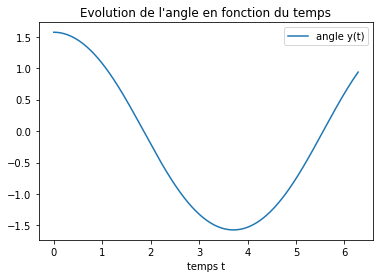

In [143]:
############################################
## REPRESENTATION GRAPHIQUE de l'ANGLE en fonction du temps 
#############################d###############
plt.plot(t, Y[:,0], label='angle y(t)')
## 
plt.xlabel("temps t")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()

#### Questions
 - Décrire le mouvement du pendule à partir de la courbe ci-dessous.
 - Que se passe-t'il si on augmente le temps final de la simulation?

In [144]:
##########################################
## UTILISER CETTE CELLULE POUR REPONDRE ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
##Nous avons une courbe qui semble être une fonction cosinus car a x=0, y n'est pas égale à 0
##
##Si nous augmentons le temps final de la simulation, nous voyons que l'amplitude ne varie pas.
##Ceci veut donc dire que la variable gama = 0; il n'y a pas de frottements

#### Question
Représenter la trajectoire et le champ de vecteurs vitesse du système correspondant à la simulation ci-dessus dans le plan de phase.

$\textbf{NB}$: vous reprendrez la programmation de l'exemple du [TP5](https://moodle.caseine.org/mod/resource/view.php?id=60272)

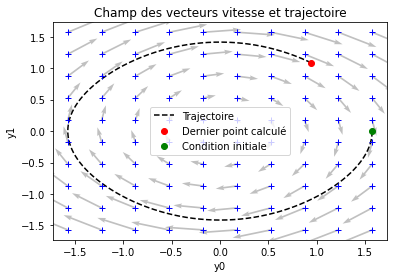

In [145]:
###############################################
## UTILISER CETTE CELLULE POUR REPRESENTER : ##
## - LA TRAJECTOIRE                          ##
## - LE CHAMP DE VECTEURS VITESSE            ##
###############################################

############################################
## Quantités nécessaires à la représentation graphique pour Y calculé précédemment
############################################
## Définition de la fenêtre graphique
y1min = min(Y[:,0])
y1max = max(Y[:,0])
y2min = min(Y[:,1])
y2max = max(Y[:,1])
axe_lim = max(abs(y1min),abs(y1max),abs(y2min),abs(y2max))
## Discrétisation du plan de phase avec 10 points dans chaque direction
## et créaction de la grille
y1 = np.linspace(-axe_lim,axe_lim,10)
y2 = np.linspace(-axe_lim,axe_lim,10)
XX,YY = np.meshgrid(y1,y2) 
############################################
## A COMPLETER ...
## Vitesse en chaque point de la grille
VX,VY = G(0,[XX,YY])

############################################
## Représentation graphique dans le champ de phase
## Option 2 ##
############################################
## Affichages :
## - points de la grille
plt.plot(Y[:,0],Y[:,1],'k--', label="Trajectoire")
plt.quiver(XX,YY,VX,VY,angles='xy',scale_units='xy',scale=4,color="silver",width=0.005)
plt.plot(Y[N-1,0],Y[N-1,1],'o',color="red", label="Dernier point calculé")
plt.plot(Y[0,0],Y[0,1],'o',color="green", label="Condition initiale")
plt.plot(XX, YY, "+b")
plt.title("Champ des vecteurs vitesse et trajectoire")
plt.xlabel("y0")
plt.ylabel("y1")
plt.legend()

#### Question
Décrire le comportement du système (angle et vitesse angulaire) dans le plan de phase.

In [146]:
##########################################
## UTILISER CETTE CELLULE POUR REPONDRE ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
## Nous sommes dans un cas sans frottements, 
##Angle: Nous regardons l'angle à partir de l'axe y0
## Dans un premier temps l'angle diminue: on passe de y0 = 1.5 à y0 = -1,5

##Vitesse Angulaire: Nous regardons la vitesse angulaire à partir de l'axe y1

##Quand la vitesse angulaire est positive, l'angle va augmenter
##Quand la vitesse angulaire est négative, l'angle va diminuer

## Nous voyons aussi que lorsque y0 s'annule, nous sommes à l'extremum de l'axe y1.
##La norme de la vitesse est au maximim

##Lorsque y1 s'annule, la vitesse s'annule, la norme de l'angle est au maximum.

## 2.2 - Sous l'hypothèse des petites amplitudes

On considère les mêmes paramètres de simulation que la simulation précédente mais pour résoudre maintenant le système différentiel linéarisé $(Eq.3)$.

#### Question
Définir la fonction $F(t,Y(t)$ en python dans la cellule ci-dessous.

In [147]:
#####################################
## COMPLETER & EXECUTER LA CELLULE ##
#####################################
## Définition de la fonction F linéaire dans le cas sans frottement
A=np.array([[0,1],[-(omega*omega),0]])
def F(t,Y):
    return np.array([A[0,0]*Y[0]+A[0,1]*Y[1],
                     A[1,0]*Y[0]+A[1,1]*Y[1]])

#### Questions
Pour la condition initiale $\theta_0 = \pi/2$ et $v_0=0$:
 - résoudre numériquement le système différentiel $(Eq.3)$ sur l'intervalle $t\in[0,2\pi/\omega]$ avec $N=1001$ points
 - réprésenter l'angle $y(t)$ en fonction du temps

In [148]:
############################################
## RESOLUTION NUMERIQUE
############################################
Y1 = odeint(F, Y0, t, tfirst=True)

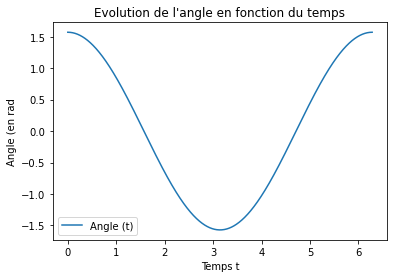

In [149]:
############################################
## REPRESENTATION GRAPHIQUE de l'ANGLE en fonction du temps 
#############################d###############
plt.plot(t, Y1[:,0], label='Angle (t)')
## 
plt.xlabel("Temps t")
plt.ylabel("Angle (en rad")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()

#### Questions
Comparer l'évolution de l'angle $y(t)$ en fonction du temps pour 
 - la solution obtenue en résolvant le système différentiel $(Eq.2)$ (section 2.1 - cas général)
 - la solution obtenue en résolvant le système différentiel linéaire $(Eq.3)$ (section 2.2 - cas des petites amplitudes)

en les traçant sur la même figure. Expliquer pourquoi ces solutions numériques sont différentes.

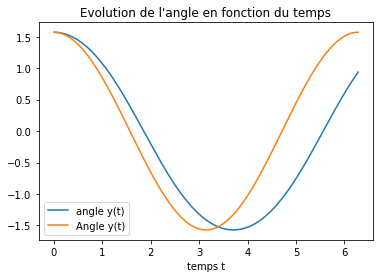

In [150]:
####################################################
## UTILISER CETTE CELLULE POUR TRACER LES COURBES ##
####################################################
plt.plot(t, Y[:,0], label='angle y(t)')
## 
plt.plot(t, Y1[:,0], label='Angle y(t)')
##
plt.xlabel("temps t")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()

In [151]:
##########################################
## UTILISER CETTE CELLULE POUR REPONDRE ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
##Nous voyons que les courbes ne sont pas superposées: L'hypothèse des petits amplitudes n'est pas satisfaite
##La cas de G(t,Y(t)) avec sin(y(t)) est suposée être égales à la F(t,Y(t)) avec y(t).
##Dans ce cas, nous voyons que l'angle utilisé n'est pas assez petite pour que G(t,Y(t)) soit linéaire et correspond donc
## à F(t,Y(t)).
##La question à devoir se poser est donc, comment choisir l'angle de départ pour que les 2 systèmes se superpose et donc,
##qu'ils soivent les 2 linéaires repondant à l'hypothèse des petites amplitudes.

#### Questions
On considère un pendule laché sans vitesse initiale ($v_0=0$). 
 - Faire varier l'angle initial $\theta_0$ entre $0$ et $\pi/2$ et comparer dans chaque cas la solution numérique du système différentiel $(Eq.2)$ avec celle de ($Eq.3)$.
 - Quelle est la valeur $\theta_{max}$ de l'angle initial $\theta_0$ qui permet de satisfaire l'hypothèse des petites amplitudes?

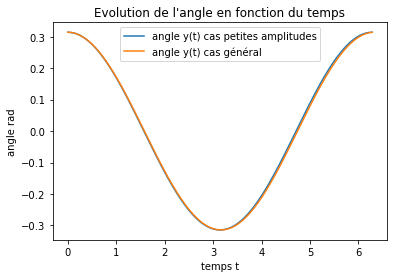

In [152]:
####################################################
## UTILISER CETTE CELLULE POUR TRACER LES COURBES ##
####################################################
theta0 = 0.1*np.pi
Y0 = [theta0,v0]
Y2 = odeint(F, Y0, t, tfirst=True)
Y = odeint(G, Y0, t, tfirst=True)
plt.plot(t, Y2[:,0], label='angle y(t) cas petites amplitudes')
plt.plot(t, Y[:,0], label='angle y(t) cas général') 
plt.xlabel("temps t")
plt.ylabel("angle rad")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()

In [153]:
##########################################
## UTILISER CETTE CELLULE POUR REPONDRE ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
##Dans ce cas, en diminuant la valeur de l'angle theta nous remarquons que l'hypothèse des petites amplitudes est justifié.
##Nous sommes donc dans un cas où G(t,Y(t)) est linéaire et correspond bien à F(t,y(t))
##

## 2.3 - Et si on lançait le pendule avec une vitesse?
On considère un pendule dont l'angle initial est $\theta_0 = \pi/2$, auquel une impulsion est donnée lors du laché.

Cette impulsion se traduit par une vitesse initial non-nulle ($v_0\ne0$).
#### Question
Illustrer avec des exemples de simulation (que vous expliquerez) ce qui se passe:
- quand la vitesse initiale $v_0$ est positive? négative?
- quand on prend la valeur $v_0=-1.5$ pour vitesse initiale

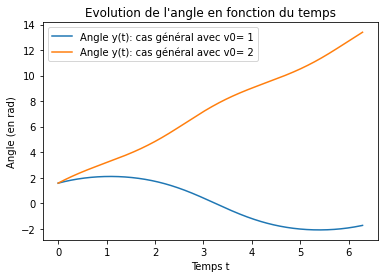

In [162]:
## Cas v0 positive
####################################################### 
## RESOLUTION et REPRESENTATION de l'EXEMPLE CHOISI  ##
#######################################################
v0 = 1
theta0 = 0.5*np.pi
Y0 = [theta0,v0]
Y = odeint(G, Y0, t, tfirst=True)
plt.plot(t, Y[:,0], label='Angle y(t): cas général avec v0= 1') 
plt.xlabel("Temps t") 
plt.ylabel("Angle (en rad)")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()

v0 = 2
theta0 = 0.5*np.pi
Y0 = [theta0,v0]
Y = odeint(G, Y0, t, tfirst=True)
plt.plot(t, Y[:,0], label='Angle y(t): cas général avec v0= 2') 
plt.xlabel("Temps t")
plt.ylabel("Angle (en rad)")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()
##########################################
## EXPLICATIONS                         ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
##L'hypothèse des petites amplitudes n'est pas satisfaite. 

##La vitesse angluaire ajouté fait en sort que nous n'oscillons plus autour du point d'équilibre, mais plutôt,
##notre pendule fait des tours.
##Nous voyons 2 cas differentes avec 2 vitesses angulaires introduites distincts.

##Quand nous introduisons v0=2 la courbe est presque linéaire, ça c'est parece que la vitesse introduite est plus grande.
##Pour la courbe v0=1, nous voyons que la courbe commence par augmenter dû à la vitesse introduite positive: l'angle augmente, 
##et puis dû poids la pendule redescends.

##Comme dans ce cas l'angle augmente , la courbe croit ce qui répondu bien au fait que la vitesse introduite est positive.

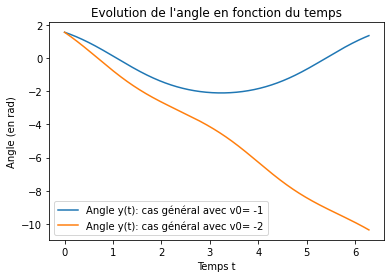

In [161]:
## Cas v0 négative
####################################################### 
## RESOLUTION et REPRESENTATION de l'EXEMPLE CHOISI  ##
#######################################################
v0 = -1
theta0 = 0.5*np.pi
Y0 = [theta0,v0]
Y = odeint(G, Y0, t, tfirst=True)
plt.plot(t, Y[:,0], label='Angle y(t): cas général avec v0= -1') 
plt.xlabel("Temps t") 
plt.ylabel("Angle (en rad)")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()
v0 = -2
theta0 = 0.5*np.pi
Y0 = [theta0,v0]
Y = odeint(G, Y0, t, tfirst=True)
plt.plot(t, Y[:,0], label='Angle y(t): cas général avec v0= -2') 
plt.xlabel("Temps t")
plt.ylabel("Angle (en rad)")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()
##########################################
## EXPLICATIONS                         ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
##L'hypothèse des petites amplitudes n'est pas satisfaite. 

##La vitesse angluaire ajouté fait en sort que nous n'oscillons plus autour du point d'équilibre, mais plutôt,
##notre pendule fait des tours.
##Nous voyons 2 cas differentes avec 2 vitesses angulaires introduites distincts.

##Quand nous introduisons v0=-2 la courbe est presque linéaire, ça c'est parece que la vitesse introduite est plus grande.
##Pour la courbe v0=-1, nous voyons que la courbe commence par diminuer dû à la vitesse introduite négative: l'angle diminue directement, 
##et puis au mouvement de la pendule et la vitesse introduite qui ne soit pas nulle, l'angle redevient positive car la pendule tourne.

##Comme dans ce cas l'angle diminue, la courbe décroit ce qui répondu bien au fait que la vitesse introduite est négative.

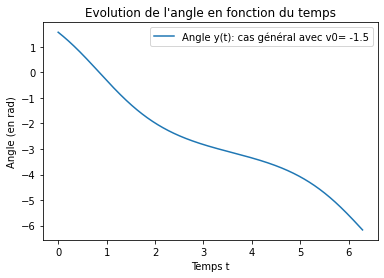

In [163]:
## Cas v0 = -1.5
####################################################### 
## RESOLUTION et REPRESENTATION de l'EXEMPLE CHOISI  ##
#######################################################
v0 = -1.5
theta0 = 0.5*np.pi
Y0 = [theta0,v0]
Y = odeint(G, Y0, t, tfirst=True)
plt.plot(t, Y[:,0], label='Angle y(t): cas général avec v0= -1.5') 
plt.xlabel("Temps t") 
plt.ylabel("Angle (en rad)")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()
##########################################
## EXPLICATIONS                         ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
##Nous sommes toujous dans un cas où la vitesse angulaire introduite est négative et l'hypothèse des petites amplitudes n'est pas satisfaite.
##Dans ce cas, nous voyons clairement que l'evolution de l'angle en fonction du temps n'est pas linéaire. 
##Initialement l'angle décroit fortement dû à la vitesse anguliare introduite, puis au moment que la pendule remonte vers sont etat d'équilibre instable l'angle est positive, mais la vitesse diminue
##Ceci nous le voyons sur la courbe entre t = 2 à t ~= 3,5
##Enfin, quand la pendule redescend vers sont état d'équilibre stable, l'angle diminue et la vitesse augmente.
##Comme la pendule tourne, nous avons une courbe de décroit.

# 3 - Etude des oscillations amorties - cas avec frottement $\gamma>0$
On propose ci-dessous la résolution numérique et la réprésentation graphique d'un exemple commenté dans le cas linéaire, c'est à dire le système différentiel $(Eq.3)$. 

In [174]:
############################################
## RESOLUTION NUMERIQUE
############################################
# Valeur de la fréquence propre du pendule
omega = 1
# Valeur du coefficient de frottement gamma
gamma = 0.25
## Définition de la fonction F linéaire dans le cas avec frottement
def F(t,Y): 
    return np.array([Y[1],
                    -omega*omega*Y[0]-gamma*(Y[1])])
############################################
## Condition initiale
theta0 = 0.5*np.pi
v0 = 0
##Y0 = [theta0,v0]
## Les N temps où la solution est calculée dans l'intervalle [t0,t0+T]
t0 = 0
## On choisit un intervalle de temps un peu long...
T = 6*np.pi*omega
N = 1001
t = np.linspace(t0, t0+T, N)
## Calcul de solution numérique
Y = odeint(F, Y0, t, tfirst=True)

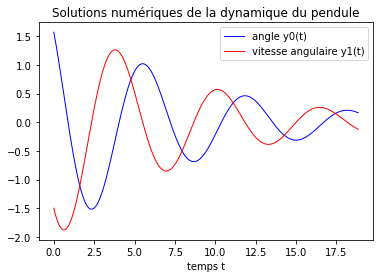

In [175]:
############################################
## REPRESENTATION GRAPHIQUE CLASSIQUE 
############################################
## - des solutions numériques du système différentiel
plt.plot(t, Y[:,0], color = "blue", lw=1, label="angle y0(t)")
plt.plot(t, Y[:,1], color = "red", lw=1, label="vitesse angulaire y1(t)")
############################################
plt.xlabel("temps t")
plt.title("Solutions numériques de la dynamique du pendule")
plt.legend()

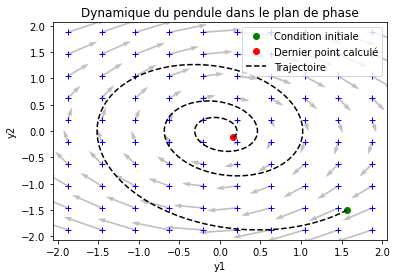

In [176]:
############################################
## Quantités nécessaires à la représentation graphique pour Y calculé précédemment
############################################
## Définition de la fenêtre graphique
y1min = min(Y[:,0])
y1max = max(Y[:,0])
y2min = min(Y[:,1])
y2max = max(Y[:,1])
axe_lim = max(abs(y1min),abs(y1max),abs(y2min),abs(y2max))
## Discrétisation du plan de phase avec 10 points dans chaque direction
## et créaction de la grille
y1 = np.linspace(-axe_lim,axe_lim,10)
y2 = np.linspace(-axe_lim,axe_lim,10)
XX,YY = np.meshgrid(y1,y2) 
## Vitesse en chaque point de la grille
VX,VY = G(0,[XX,YY])
############################################
## REPRESENTATION GRAPHIQUE
## DANS LE PLAN DE PHASE - OPTION 1
############################################
## Affichages :
## - points de la grille
plt.plot(XX, YY, "+b")
## - vecteurs vitesse
plt.quiver(XX,YY,VX,VY,angles='xy',scale_units='xy',scale=4,color="silver",width=0.005)
## - condition initiale
plt.plot(Y[0,0],Y[0,1],'o',color="green", label="Condition initiale")
## - dernier point de la simulation
plt.plot(Y[N-1,0],Y[N-1,1],'o',color="red", label="Dernier point calculé")
## - trajectoire
plt.plot(Y[:,0],Y[:,1],'k--', label="Trajectoire")
############################################ 
plt.title("Dynamique du pendule dans le plan de phase")
plt.xlabel("y1")
plt.ylabel("y2")
plt.legend()

#### Question
 - Reprendre l'exemple ci-dessus en faisant varier le coefficient de frottement pour identifier un changement dans la dynamique du mouvement du pendule
 - Donner un exemple (avec la valeur de $\gamma$ que vous avez choisie) pour les 2 régimes observés que vous décrirez

In [179]:
##########################################
## UTILISER CETTE CELLULE POUR REPONDRE ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
##Lorsque nous diminuons la valeur de gama (example gama = 0.25); le nombre de spirales augmente ce qui veut dire que les frottements sont moindre, 
##ce qui permet des ocsillations au pendule avant de retrouver son état d'équilibre stable.
##
##Lorsque nous augmentons la valeur de gama (example gama = 2); augmenter les frottements, la trajectoire devient une droite:
## Il n'y a donc pas d'oscillations, la pendule revient directement à son état d'équilibre stable.


#### Question
Proposer une explication de ce changement de régime en calculant les valeurs propres de la matrice 

$$\left(
\begin{array}{cc}
0&1\\
-\omega^2&-\gamma
\end{array}
\right)$$

du système différentiel linéarisé $(Eq.3)$ autour de l'état d'équilibre vertical vers le bas du pendule. 

In [183]:
##########################################
## UTILISER CETTE CELLULE POUR REPONDRE ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
##Calculons les valeurs propres de la matrice:
##Si les valeurs propres sont réelles: il n'y a pas d'oscillation
##Si les valeurs propres sont complexes: il y a des oscillations

##Puis si pour savoir si nous sommes dans un cas stable ou instable pour le point d'équilibre regardons les signes des valeurs propres:
##Si valeurs propres negatifs: stable
##Si valeurs propres positifs: instable
##Si un valeur propre negatif, un valeur propre positif: instable et point selle

##Avec cette matrice, nos 2 valeurs propres sont négatifs, donc stable et nos valeurs propres sont complexes, donc oscillent. 

#### Question
Que pouvez-vous déduire de la question précédente en ce qui concerne la stabilité du point d'équilibre $Y_e=\left[ \begin{array}{c} 0\\ 0 \end{array}\right]$ (c'est à dire l'état d'équilibre vertical vers le bas du pendule)?

$\textbf{NB}$ : Vous pourrez consulter la [classification](https://moodle.caseine.org/pluginfile.php/145137/mod_resource/content/0/types_equilibre.pdf) présentée en cours.

In [100]:
##########################################
## UTILISER CETTE CELLULE POUR REPONDRE ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
##
##
##